In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve

/var/folders/pv/088xlq6n437b0m1bfcy9zv840000gn/T/ipykernel_31415/3771009642.py:47: RuntimeWarning: divide by zero encountered in power
  q = (wages ** (-0.5))


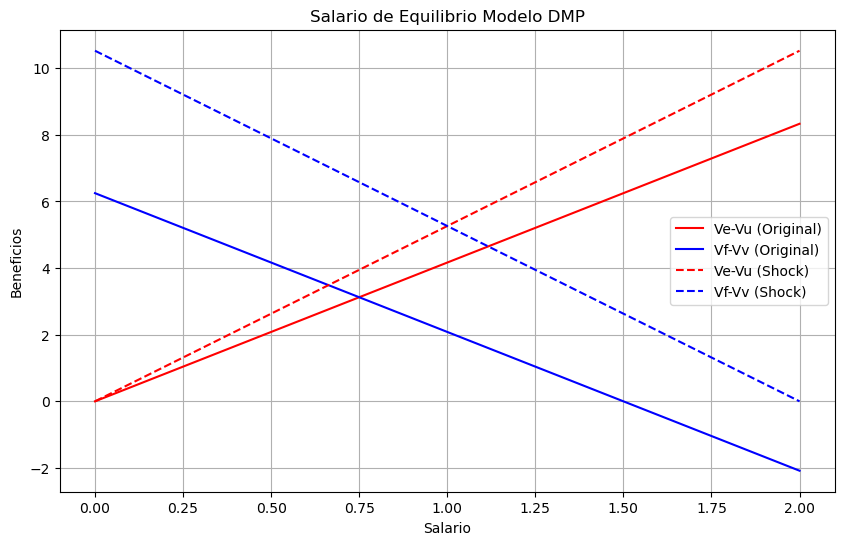

In [1]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

# Parámetros constantes
beta = 0.5
gamma = 1 - beta
K = 1
r = 0.04
b = 0.1
C = 1

# Función para calcular el salario de equilibrio w
def calculate_w(A):
    return beta * (A + b) + (1 - beta) * C

# Función de equilibrio
def equilibrium_conditions(x, A, s):
    theta, u = x
    q_theta = theta ** (-0.5)
    w = calculate_w(A)
    eq1 = theta - (A - w) / (K * (r + q_theta))
    eq2 = s * u - theta * q_theta * (1 - u)
    return [eq1, eq2]

# Resolver el sistema de ecuaciones
def solve_equilibrium(A, s):
    initial_guess = [1, 0.1]
    theta_eq, u_eq = fsolve(equilibrium_conditions, initial_guess, args=(A, s))
    w_eq = calculate_w(A)
    return w_eq, theta_eq, u_eq

# Calcular los equilibrios originales y después del shock
A_original = 1.5
s_original = 0.1
A_shock = 2.0
s_shock = 0.05

w_original, theta_original, u_original = solve_equilibrium(A_original, s_original)
w_shock, theta_shock, u_shock = solve_equilibrium(A_shock, s_shock)

# Rango de salarios para el gráfico
wages = np.linspace(0, 2, 100)

# Calcular Ve - Vu y Vf - Vv para los salarios dados
def calculate_differences(wages, A, s):
    q = (wages ** (-0.5))
    Ve_Vu = wages / (s + b + r)
    Vf_Vv = (A - wages) / (s + b + r)
    return Ve_Vu, Vf_Vv

Ve_Vu_original, Vf_Vv_original = calculate_differences(wages, A_original, s_original)
Ve_Vu_shock, Vf_Vv_shock = calculate_differences(wages, A_shock, s_shock)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(wages, Ve_Vu_original, 'r-', label='Ve-Vu (Original)')
plt.plot(wages, Vf_Vv_original, 'b-', label='Vf-Vv (Original)')
plt.plot(wages, Ve_Vu_shock, 'r--', label='Ve-Vu (Shock)')
plt.plot(wages, Vf_Vv_shock, 'b--', label='Vf-Vv (Shock)')

plt.xlabel('Salario')
plt.ylabel('Beneficios')
plt.title('Salario de Equilibrio Modelo DMP')
plt.legend()
plt.grid(True)
plt.show()

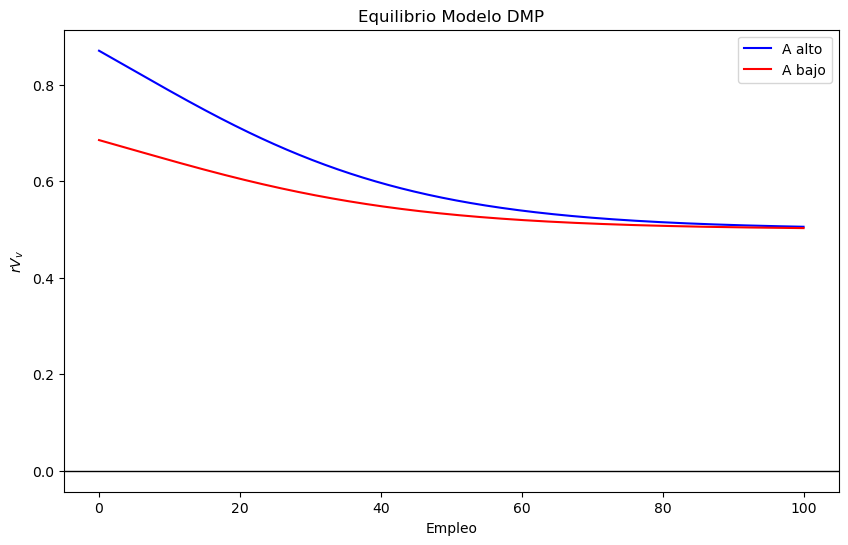

In [58]:
# Ahora lo calculamos para el empleo del modelo de DCP
import matplotlib.pyplot as plt
import numpy as np

# Definir las funciones y constantes
def alpha(E):
    return 0.2 * np.exp(-0.05 * E)  # Función de ejemplo, reemplazar con la función real

def a(E):
    return 0.1 * np.exp(-0.05 * E)  # Función de empleo de es decreciente 

C = -0.5  
b = 0.1  
r = 0.02  
A_alto = -1.0  
A_bajo = -0.5  

# Rango de empleo
empleo = np.linspace(0, 100, 500)

# Calcular rVv para A alto y A bajo
rVv_alto = -C + (-alpha(empleo) / (a(empleo) + alpha(empleo) + 2 * b + 2 * r)) * A_alto
rVv_bajo = -C + (-alpha(empleo) / (a(empleo) + alpha(empleo) + 2 * b + 2 * r)) * A_bajo

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(empleo, rVv_alto, label='A alto', color='blue')
plt.plot(empleo, rVv_bajo, label='A bajo', color='red')

# Añadir etiquetas y título
plt.xlabel('Empleo')
plt.ylabel(r'$rV_v$')
plt.title('Equilibrio Modelo DMP')
plt.axhline(0, color='black', linewidth=1)
plt.legend()

# Mostrar la gráfica
plt.show()

In [8]:
#Inciso (a)
# Parámetros proporcionados
beta = 0.5
gamma = 1 - beta
A = 1.5
K = 1
r = 0.04
b = 0.1
C = 1
L_bar = 100
s = 0.1  # Suponiendo una tasa de despido s

In [9]:
# Paso 1: Calcular el salario de equilibrio w
w = beta * (A + b) + (1 - beta) * C

# Función de coincidencia sujeta a la tecnología de coincidencia Cobb-Douglas: m(θ) = θ^α
alpha = 0.5  # Suposición para la función de coincidencia Cobb-Douglas

def equilibrium_conditions(x):
    theta, u = x
    q_theta = theta ** (-alpha)
    eq1 = theta - (A - w) / (K * (r + q_theta))
    eq2 = s * u - theta * q_theta * (1 - u)
    return [eq1, eq2]

# Valores iniciales para theta y u
initial_guess = [1, 0.1]

# Resolver el sistema de ecuaciones no lineales
theta_eq, u_eq = fsolve(equilibrium_conditions, initial_guess)

# Mostrar los valores de equilibrio
print(f"Salario de equilibrio (w): {w}")
print(f"Tasa de vacantes (theta_eq): {theta_eq}")
print(f"Tasa de desempleo (u_eq): {u_eq}")

Salario de equilibrio (w): 1.3
Tasa de vacantes (theta_eq): 0.03937251999268976
Tasa de desempleo (u_eq): 0.6649075420670438


Original - Salario de equilibrio (w): 1.3, Tasa de vacantes (theta_eq): 0.03937251999268976, Tasa de desempleo (u_eq): 0.6649075420670438
Shock - Salario de equilibrio (w): 1.55, Tasa de vacantes (theta_eq): 0.1955223613802682, Tasa de desempleo (u_eq): 0.8984109657709776


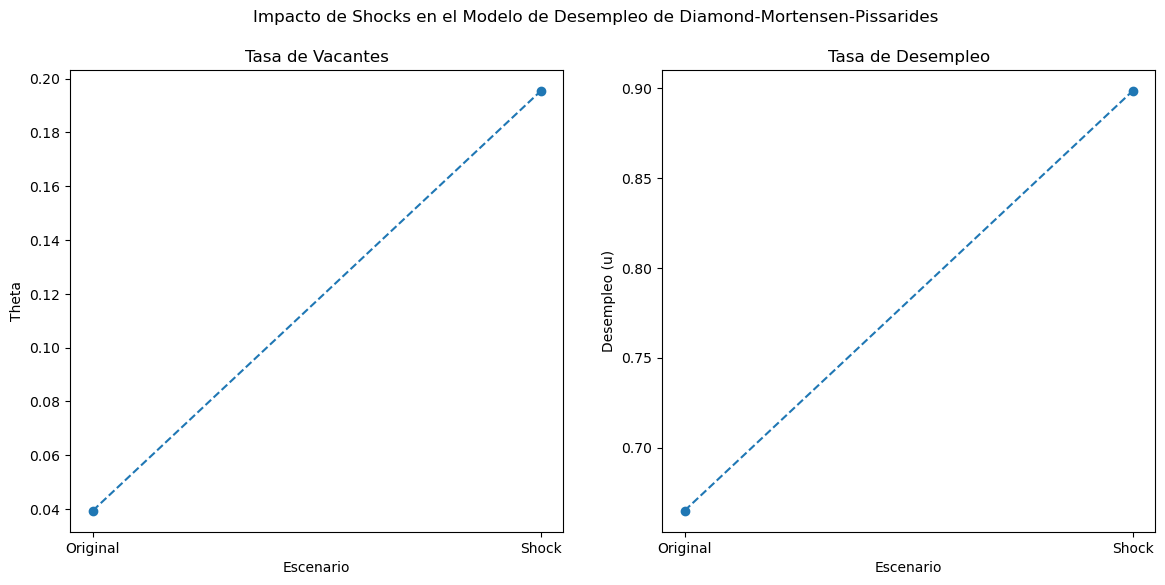

In [10]:
#Inciso (b)
# Función para calcular el equilibrio
def calculate_equilibrium(A, s):
    # Parámetros constantes
    beta = 0.5
    gamma = 1 - beta
    K = 1
    r = 0.04
    b = 0.1
    C = 1

    # Calcular el salario de equilibrio w
    w = beta * (A + b) + (1 - beta) * C

    # Función de coincidencia sujeta a la tecnología de coincidencia Cobb-Douglas: m(θ) = θ^α
    alpha = 0.5  # Suposición para la función de coincidencia Cobb-Douglas

    def equilibrium_conditions(x):
        theta, u = x
        q_theta = theta ** (-alpha)
        eq1 = theta - (A - w) / (K * (r + q_theta))
        eq2 = s * u - theta * q_theta * (1 - u)
        return [eq1, eq2]

    # Valores iniciales para theta y u
    initial_guess = [1, 0.1]

    # Resolver el sistema de ecuaciones no lineales
    theta_eq, u_eq = fsolve(equilibrium_conditions, initial_guess)

    return w, theta_eq, u_eq

# Parámetros originales
A_original = 1.5
s_original = 0.1

# Parámetros después del shock
A_shock = 2.0
s_shock = 0.05  # Suponiendo una tasa de despido más baja después del shock

# Calcular los equilibrios
w_original, theta_original, u_original = calculate_equilibrium(A_original, s_original)
w_shock, theta_shock, u_shock = calculate_equilibrium(A_shock, s_shock)

# Imprimir los resultados
print(f"Original - Salario de equilibrio (w): {w_original}, Tasa de vacantes (theta_eq): {theta_original}, Tasa de desempleo (u_eq): {u_original}")
print(f"Shock - Salario de equilibrio (w): {w_shock}, Tasa de vacantes (theta_eq): {theta_shock}, Tasa de desempleo (u_eq): {u_shock}")

# Graficar los resultados
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de la tasa de vacantes
axs[0].plot(["Original", "Shock"], [theta_original, theta_shock], marker='o', linestyle='--')
axs[0].set_title('Tasa de Vacantes')
axs[0].set_xlabel('Escenario')
axs[0].set_ylabel('Theta')

# Gráfico de la tasa de desempleo
axs[1].plot(["Original", "Shock"], [u_original, u_shock], marker='o', linestyle='--')
axs[1].set_title('Tasa de Desempleo')
axs[1].set_xlabel('Escenario')
axs[1].set_ylabel('Desempleo (u)')

plt.suptitle('Impacto de Shocks en el Modelo de Desempleo de Diamond-Mortensen-Pissarides')
plt.show()